In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [41]:
std = '1275'

cal_folder = r'C:\\Users\\amdm_\\OneDrive\\Documents\\GitHub\\viscosity_liquid_transfer_Pablo\\Std_calibrations\\'
exp_folder = r'C:\\Users\\amdm_\\OneDrive\\Documents\\GitHub\\viscosity_liquid_transfer_Pablo\\Opentrons_experiments\\BOTorch_optimization\\Opentrons_csv\\'
ini_folder = r'C:\\Users\\amdm_\\OneDrive\\Documents\\GitHub\\viscosity_liquid_transfer_Pablo\\Opentrons_experiments\\Random_initialisation_data_ver3\\'

df_cal = pd.read_csv(cal_folder+'Viscosity_std_'+std+'.csv')
df_ini = pd.read_csv(ini_folder+'Viscosity_std_'+std+'.csv')
df_exp_1 = pd.read_csv(exp_folder+'BOTorch_optimization_exp1_Viscosity_std_'+std+'.csv')
df_exp_2 = pd.read_csv(exp_folder+'BOTorch_optimization_exp2_Viscosity_std_'+std+'.csv')


df_cal


,liquid,Viscosity 900 s-1,Viscosity 100 s-1,Viscosity 10 s-1,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,touch_tip_aspirate,touch_tip_dispense,time,%error,m_measured,m_expected
0,Viscosity_std_1275,1275,1275,1275,p1000,1000,22.0,11,0,3,3,0,True,False,149.339134,-16.014194,0.7337,0.87360
1,Viscosity_std_1275,1275,1275,1275,p1000,1000,20.0,11,0,3,3,0,True,False,153.996220,-12.877747,0.7611,0.87360
2,Viscosity_std_1275,1275,1275,1275,p1000,1000,16.0,11,0,3,3,0,True,False,165.906338,-11.137821,0.7763,0.87360
3,Viscosity_std_1275,1275,1275,1275,p1000,1000,16.0,9,0,3,3,0,True,False,191.647667,-16.907051,0.7259,0.87360
4,Viscosity_std_1275,1275,1275,1275,p1000,1000,14.0,9,0,3,3,0,True,False,200.877497,-9.603938,0.7897,0.87360
5,Viscosity_std_1275,1275,1275,1275,p1000,1000,13.0,9,0,3,3,0,True,False,206.233005,-8.161630,0.8023,0.87360
6,Viscosity_std_1275,1275,1275,1275,p1000,1000,11.0,9,0,3,3,0,True,False,219.558985,-6.181319,0.8196,0.87360
7,Viscosity_std_1275,1275,1275,1275,p1000,1000,9.0,9,0,3,3,0,True,False,244.087675,-4.532967,0.8340,0.87360
8,Viscosity_std_1275,1275,1275,1275,p1000,500,9.0,9,0,3,3,0,True,False,128.889433,-9.134615,0.3969,0.43680
9,Viscosity_std_1275,1275,1275,1275,p1000,500,9.0,9,0,3,3,0,True,False,129.672833,-9.134615,0.3969,0.43680


In [45]:
df_exp_2['time_asp_1000'] = 1000/df_exp_2['aspiration_rate'] + 1000/df_exp_2['dispense_rate'] + df_exp_2['delay_aspirate'] + df_exp_2['delay_dispense']

In [46]:
index_cal = np.arange(len(df_cal.index))
index_ini = np.arange(len(df_ini.index))

df_cal_1000 = df_cal.where(df_cal.volume==1000).dropna(how='all')
df_cal_500 = df_cal.where(df_cal.volume==500).dropna(how='all')
df_cal_300 = df_cal.where(df_cal.volume==300).dropna(how='all')

df_ini_1000 = df_ini.where(df_ini.volume==1000).dropna(how='all')
df_ini_500 = df_ini.where(df_ini.volume==500).dropna(how='all')
df_ini_100 = df_ini.where(df_ini.volume==100).dropna(how='all')

df_exp_1_1000 = df_exp_1.where(df_exp_1.volume==1000).dropna(how='all')
df_exp_1_500 = df_exp_1.where(df_exp_1.volume==500).dropna(how='all')
df_exp_1_100 = df_exp_1.where(df_exp_1.volume==100).dropna(how='all')

df_exp_2_1000 = df_exp_2.where(df_exp_2.volume==1000).dropna(how='all')
df_exp_2_500 = df_exp_2.where(df_exp_2.volume==500).dropna(how='all')
df_exp_2_100 = df_exp_2.where(df_exp_2.volume==100).dropna(how='all')




No handles with labels found to put in legend.


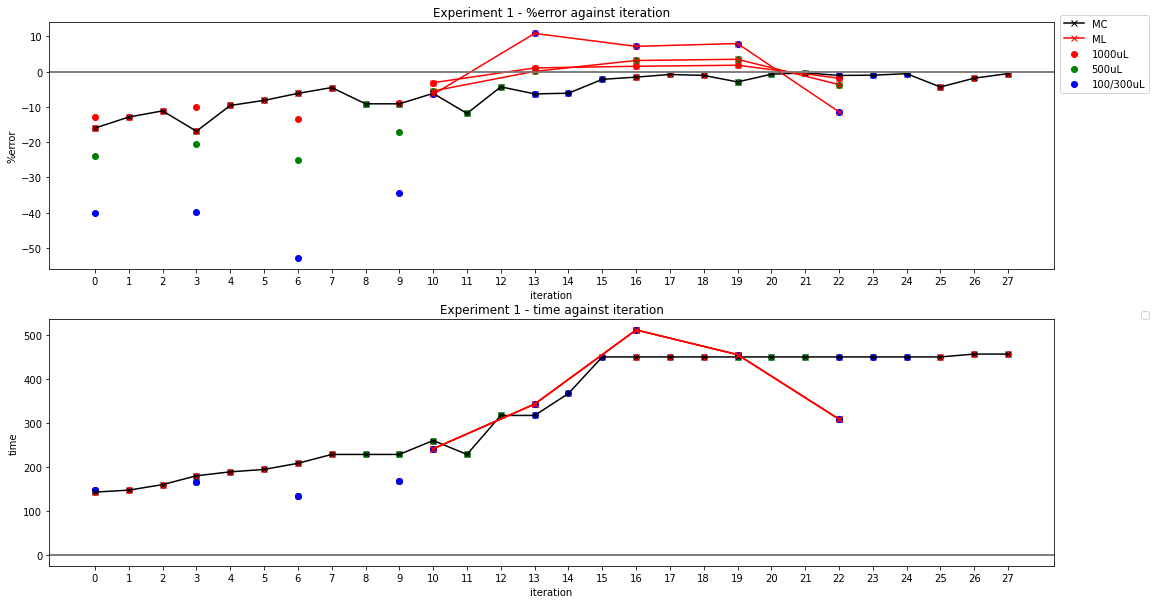

In [48]:
fig , axs = plt.subplots(2,1)

fig.set_size_inches(18, 10)

# 0 - Experiment 1
    # calibration
axs[0].scatter(df_cal_1000.index,df_cal_1000[r'%error'],label='1000uL', color = 'red')
axs[0].scatter(df_cal_500.index,df_cal_500[r'%error'],label='500uL',color = 'green')
axs[0].scatter(df_cal_300.index,df_cal_300[r'%error'],label='100/300uL',color = 'blue')
axs[0].plot(index_cal,df_cal[r'%error'],color='black',marker = 'x',label = 'MC')
axs[0].axhline(y=0,color='grey')
axs[0].set_xticks(index_cal)

    # initialization
axs[0].scatter(df_ini_1000.index,df_ini_1000[r'%error'],color = 'red')
axs[0].scatter(df_ini_500.index-1,df_ini_500[r'%error'],color = 'green')
axs[0].scatter(df_ini_100.index-2,df_ini_100[r'%error'],color = 'blue')
# axs[0].plot(df_ini_1000.index,df_ini_1000[r'%error'],color='black',marker = 'x')
# axs[0].plot(df_ini_500.index-1,df_ini_500[r'%error'],color='black',marker = 'x')
# axs[0].plot(df_ini_100.index-2,df_ini_100[r'%error'],color='black',marker = 'x')
axs[0].axhline(y=0,color='grey')

    # BOTorch optimisation
axs[0].scatter(df_exp_1_1000.index+10,df_exp_1_1000[r'%error'], color = 'red')
axs[0].scatter(df_exp_1_500.index+9,df_exp_1_500[r'%error'],color = 'green')
axs[0].scatter(df_exp_1_100.index+8,df_exp_1_100[r'%error'],color = 'blue')
axs[0].plot(df_exp_1_1000.index+10,df_exp_1_1000[r'%error'],color='red',marker = 'x',label='ML')
axs[0].plot(df_exp_1_500.index+9,df_exp_1_500[r'%error'],color='red',marker = 'x')
axs[0].plot(df_exp_1_100.index+8,df_exp_1_100[r'%error'],color='red',marker = 'x')
axs[0].axhline(y=0,color='grey')

axs[0].set_xlabel('iteration')
axs[0].set_ylabel(r'%error')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
axs[0].set_title(r'Experiment 1 - %error against iteration')

# 1 - Experiment 1 time
    # 1 - calibration
axs[1].scatter(df_cal_1000.index,df_cal_1000['time_asp_1000'],color = 'red')
axs[1].scatter(df_cal_500.index,df_cal_500[r'time_asp_1000'],color = 'green')
axs[1].scatter(df_cal_300.index,df_cal_300[r'time_asp_1000'],color = 'blue')
axs[1].plot(index_cal,df_cal[r'time_asp_1000'],color='black',marker = 'x')
axs[1].axhline(y=0,color='grey')
axs[1].set_xticks(index_cal)

axs[1].set_xlabel('iteration')
axs[1].set_ylabel(r'time')

    # initialization
axs[1].scatter(df_ini_1000.index,df_ini_1000[r'time_asp_1000'],color = 'red')
axs[1].scatter(df_ini_500.index-1,df_ini_500[r'time_asp_1000'],color = 'green')
axs[1].scatter(df_ini_100.index-2,df_ini_100[r'time_asp_1000'],color = 'blue')
# axs[1].plot(df_ini_1000.index,df_ini_1000[r'%error'],color='black',marker = 'x')
# axs[1].plot(df_ini_500.index-1,df_ini_500[r'%error'],color='black',marker = 'x')
# axs[1].plot(df_ini_100.index-2,df_ini_100[r'%error'],color='black',marker = 'x')
axs[1].axhline(y=0,color='grey')

    # BOTorch optimisation
axs[1].scatter(df_exp_1_1000.index+10,df_exp_1_1000[r'time_asp_1000'],color = 'red')
axs[1].scatter(df_exp_1_500.index+9,df_exp_1_500[r'time_asp_1000'],color = 'green')
axs[1].scatter(df_exp_1_100.index+8,df_exp_1_100[r'time_asp_1000'],color = 'blue')
axs[1].plot(df_exp_1_1000.index+10,df_exp_1_1000[r'time_asp_1000'],color='red',marker = 'x')
axs[1].plot(df_exp_1_500.index+9,df_exp_1_500[r'time_asp_1000'],color='red',marker = 'x')
axs[1].plot(df_exp_1_100.index+8,df_exp_1_100[r'time_asp_1000'],color='red',marker = 'x')
axs[1].axhline(y=0,color='grey')

axs[1].set_xlabel('iteration')
axs[1].set_ylabel(r'time')
axs[1].legend(bbox_to_anchor=(1.1, 1.05))
axs[1].set_title(r'Experiment 1 - time against iteration')


fig.savefig(exp_folder+r'/'+'Viscosity_std_'+std+r'_iteration_against_%error_and_time_comparison'+'_exp1'+'.png')




No handles with labels found to put in legend.


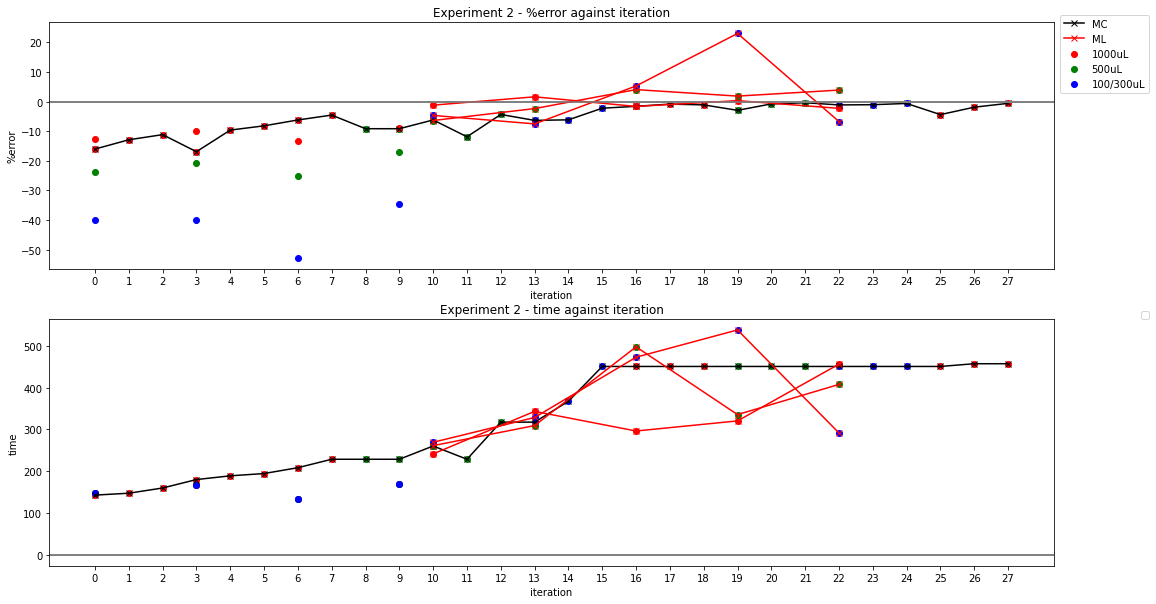

In [49]:
fig , axs = plt.subplots(2,1)

fig.set_size_inches(18, 10)

axs[0].scatter(df_cal_1000.index,df_cal_1000[r'%error'],label = '1000uL',color = 'red')
axs[0].scatter(df_cal_500.index,df_cal_500[r'%error'],label = '500uL', color = 'green')
axs[0].scatter(df_cal_300.index,df_cal_300[r'%error'],label = '100/300uL',color = 'blue')
axs[0].plot(index_cal,df_cal[r'%error'],color='black',marker = 'x',label = "MC")
axs[0].axhline(y=0,color='grey')
axs[0].set_xticks(index_cal)

axs[0].set_xlabel('iteration')
axs[0].set_ylabel(r'%error')

    # initialization
axs[0].scatter(df_ini_1000.index,df_ini_1000[r'%error'],color = 'red')
axs[0].scatter(df_ini_500.index-1,df_ini_500[r'%error'],color = 'green')
axs[0].scatter(df_ini_100.index-2,df_ini_100[r'%error'],color = 'blue')
# axs[1].plot(df_ini_1000.index,df_ini_1000[r'%error'],color='black',marker = 'x')
# axs[1].plot(df_ini_500.index-1,df_ini_500[r'%error'],color='black',marker = 'x')
# axs[1].plot(df_ini_100.index-2,df_ini_100[r'%error'],color='black',marker = 'x')
axs[0].axhline(y=0,color='grey')

    # BOTorch optimisation
axs[0].scatter(df_exp_2_1000.index+10,df_exp_2_1000[r'%error'],color = 'red')
axs[0].scatter(df_exp_2_500.index+9,df_exp_2_500[r'%error'],color = 'green')
axs[0].scatter(df_exp_2_100.index+8,df_exp_2_100[r'%error'],color = 'blue')
axs[0].plot(df_exp_2_1000.index+10,df_exp_2_1000[r'%error'],color='red',marker = 'x',label = 'ML')
axs[0].plot(df_exp_2_500.index+9,df_exp_2_500[r'%error'],color='red',marker = 'x')
axs[0].plot(df_exp_2_100.index+8,df_exp_2_100[r'%error'],color='red',marker = 'x')
axs[0].axhline(y=0,color='grey')

axs[0].set_xlabel('iteration')
axs[0].set_ylabel(r'%error')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
axs[0].set_title(r'Experiment 2 - %error against iteration')


# 1 - Experiment 1 time
    # 1 - calibration
axs[1].scatter(df_cal_1000.index,df_cal_1000[r'time_asp_1000'],color = 'red')
axs[1].scatter(df_cal_500.index,df_cal_500[r'time_asp_1000'],color = 'green')
axs[1].scatter(df_cal_300.index,df_cal_300[r'time_asp_1000'],color = 'blue')
axs[1].plot(index_cal,df_cal[r'time_asp_1000'],color='black',marker = 'x')
axs[1].axhline(y=0,color='grey')
axs[1].set_xticks(index_cal)

axs[1].set_xlabel('iteration')
axs[1].set_ylabel(r'time')

    # initialization
axs[1].scatter(df_ini_1000.index,df_ini_1000[r'time_asp_1000'],color = 'red')
axs[1].scatter(df_ini_500.index-1,df_ini_500[r'time_asp_1000'],color = 'green')
axs[1].scatter(df_ini_100.index-2,df_ini_100[r'time_asp_1000'],color = 'blue')
# axs[1].plot(df_ini_1000.index,df_ini_1000[r'%error'],color='black',marker = 'x')
# axs[1].plot(df_ini_500.index-1,df_ini_500[r'%error'],color='black',marker = 'x')
# axs[1].plot(df_ini_100.index-2,df_ini_100[r'%error'],color='black',marker = 'x')
axs[1].axhline(y=0,color='grey')

    # BOTorch optimisation
axs[1].scatter(df_exp_2_1000.index+10,df_exp_2_1000[r'time_asp_1000'],color = 'red')
axs[1].scatter(df_exp_2_500.index+9,df_exp_2_500[r'time_asp_1000'],color = 'green')
axs[1].scatter(df_exp_2_100.index+8,df_exp_2_100[r'time_asp_1000'],color = 'blue')
axs[1].plot(df_exp_2_1000.index+10,df_exp_2_1000[r'time_asp_1000'],color='red',marker = 'x')
axs[1].plot(df_exp_2_500.index+9,df_exp_2_500[r'time_asp_1000'],color='red',marker = 'x')
axs[1].plot(df_exp_2_100.index+8,df_exp_2_100[r'time_asp_1000'],color='red',marker = 'x')
axs[1].axhline(y=0,color='grey')

axs[1].set_xlabel('iteration')
axs[1].set_ylabel(r'time')
axs[1].legend(bbox_to_anchor=(1.1, 1.05))
axs[1].set_title(r'Experiment 2 - time against iteration')

fig.savefig(exp_folder+r'/'+'Viscosity_std_'+std+r'_iteration_against_%error_and_time_comparison'+'_exp2'+'.png')



In [6]:
plt.plot(index,df.error,color='black',marker = 'x')
plt.axhline(y=0,color='grey')
plt.xticks(np.arange(len(index)), size = 10)

plt.xlabel('iteration',size = 12)
plt.ylabel('%error',size = 12)

plt.title('LIN_1_wo_bo_scale_multiply_unorderedT', size = 18)

plt.savefig("LIN_1_wo_bo_scale_multiply_unorderedT")

NameError: name 'index' is not defined

AttributeError: 'DataFrame' object has no attribute 'standard'

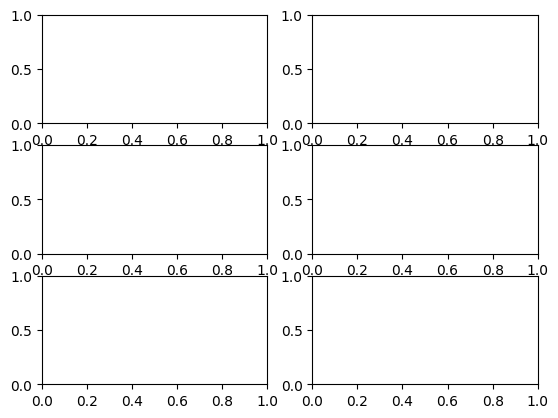

In [ ]:
fig,ax = plt.subplots(3,2)

plt.subplot(3, 2, 1)
plt.plot(df.standard,df.Aspiration_rate,marker='x')


plt.subplot(3, 2, 2)
plt.plot(df.standard,df.Dispense_rate,marker='x')


plt.subplot(3, 2, 3)
plt.plot(df.standard,df.Aspiration_delay,marker='x')


plt.subplot(3, 2, 4)
plt.plot(df.standard,df.Dispense_delay,marker='x')


plt.subplot(3, 2, 5)
plt.plot(df.standard,df.Blowout_rate,marker='x')


plt.subplot(3, 2, 6)
plt.plot(df.standard,df.Blowout_delay,marker='x')




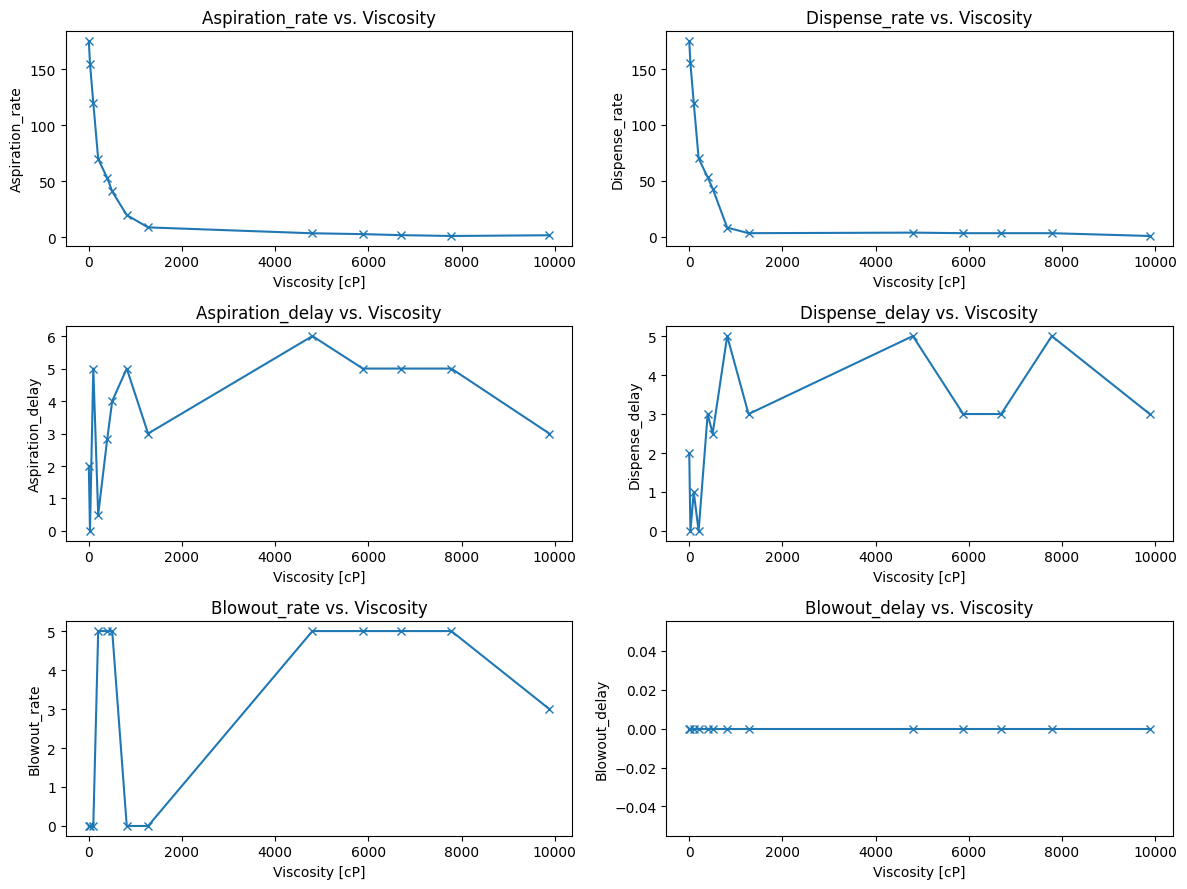

In [ ]:
fig, axs = plt.subplots(3,2,figsize=(12,9))

# ':,' means for all of something ':,0' means for all in column 0
# columns: The columns property returns the label of each column in the DataFrame.

counter = 1 

for list_axis in axs:
    for axis in list_axis:
        axis.plot(df.iloc[:,0], df.iloc[:,counter],marker='x')
        axis.set_title(df.columns[counter]+' vs. Viscosity')
        axis.set_xlabel('Viscosity [cP]')
        axis.set_ylabel(df.columns[counter])
        counter+=1

fig.tight_layout()

plt.savefig('each parameter against viscosity')

# Failed ones/drafts

In [ ]:
index1 = [0,1,2]
index2 = [3,4,5,6]
index3 = [7,8,9,10,11,12,13,14,15,16,17,18,19,20]
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

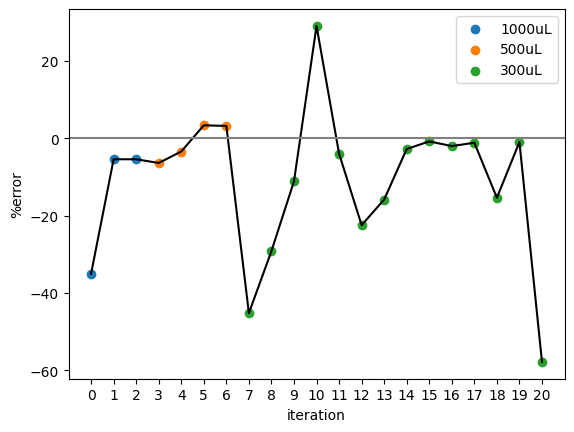

In [ ]:
plt.scatter(index1,sample_data.error[:3],label='1000uL')
plt.scatter(index2,sample_data.error[3:7],label='500uL')
plt.scatter(index3,sample_data.error[7:],label='300uL')
plt.plot(index,sample_data.error,color='black',marker = 'x')
plt.axhline(y=0,color='grey')
plt.xticks(np.arange(len(index)))

plt.xlabel('iteration')
plt.ylabel('%error')
plt.legend()


In [ ]:
df_9884

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_1,delay_2,delay_3,delay_4,...,touch_tip_2,two_step_dispense,density,time,mi,mf,m,error,Transfer_Observation,Comment
0,Viscosity_std_9884,p1000,1000.0,3,4.0,0,3,0,3,3,...,False,False,0.8844,660.527683,21.0692,21.6436,0.5744,-35.052013,Complete Transfer,Updated liquid level
1,Viscosity_std_9884,p1000,1000.0,2,0.5,2,3,0,3,3,...,False,False,0.8844,2842.274222,25.5142,26.3507,0.8365,-5.416101,Complete Transfer,No comment
2,Viscosity_std_9884,p1000,1000.0,2,0.5,2,3,0,3,3,...,False,False,0.8844,2842.274222,25.5142,26.3507,0.8365,-5.416101,Complete Transfer,No comment
3,Viscosity_std_9884,p1000,500.0,2,0.5,4,3,0,3,3,...,False,False,0.8844,1440.003074,23.7596,24.1736,0.4140,-6.377205,Incomplete Dispense,No comment
4,Viscosity_std_9884,p1000,500.0,2,0.5,2,3,0,3,3,...,False,False,0.8844,1473.887567,24.1736,24.6007,0.4271,-3.414744,NaN,No comment
5,Viscosity_std_9884,p1000,500.0,2,0.5,2,3,0,3,3,...,False,False,0.8844,1473.888107,24.6007,25.0578,0.4571,3.369516,Complete Transfer,No comment
6,Viscosity_std_9884,p1000,500.0,2,0.5,2,3,0,3,3,...,False,False,0.8844,1473.920907,25.0578,25.5142,0.4564,3.211217,Complete Transfer,No comment
7,Viscosity_std_9884,p1000,300.0,2,4.0,0,3,0,3,3,...,False,False,0.8844,271.998130,21.6436,21.7889,0.1453,-45.235942,Incomplete Dispense,Updated liquid level
8,Viscosity_std_9884,p1000,300.0,2,2.0,0,3,0,3,3,...,False,False,0.8844,355.626787,21.7889,21.9768,0.1879,-29.179858,Incomplete Dispense,Updated liquid level
9,Viscosity_std_9884,p1000,300.0,2,1.0,0,3,0,3,3,...,False,False,0.8844,522.858631,21.9768,22.2126,0.2358,-11.126187,Incomplete Dispense,Updated liquid level


In [ ]:
AR = df.Aspiration
DR = df.iloc[1]
AD = df.iloc[2]
DD = df.iloc[3]
BR = df.iloc[4]
BD = df.iloc[5]

standard=[3,28,99,204,398,505,817,1275,4801,5882,6695,7782,9884]